# Graphs for Dashboard

### Importing all the libraries

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import json
import ast
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random

### Importing the movies dataset

In [154]:
movies_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\movies_metadata.csv")
movies_df.head()

C:\Users\Jatin Dhall\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Importing the ratings dataset

In [155]:
ratings_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


### Importing the links dataset

In [156]:
links_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\links.csv")
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Importing the credits dataset

In [157]:
credits_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\credits.csv")
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


### Importing the keywords dataset

In [158]:
keywords_df = pd.read_csv("C:\\Users\\Jatin Dhall\\Desktop\\Desktop File\\VIT\\VIT\\SEM 3\\DATA VIZ\\Project\\Movie Dataset\\keywords.csv")
keywords_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


# Handling missing values

In [159]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [160]:
movies_df = movies_df.drop(columns = ["belongs_to_collection","homepage","tagline"],axis = 1)

In [161]:
movies_df = movies_df.dropna(axis = 0, how ='any')

In [162]:
movies_df.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

### Removing the rows containing either budget or revenue as 0

In [163]:
#Filtering out all the rows where budget or revenue is 0
df_filtered = movies_df[(movies_df['budget'] != "0")]
df_filtered = df_filtered[(movies_df['revenue'] != 0.0)]
df_filtered.head()

<ipython-input-163-ec90a61dd1d6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[(movies_df['revenue'] != 0.0)]


,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0
8,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,False,5.5,174.0


In [164]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [165]:
links_df.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [166]:
links_df = links_df.dropna(axis = 0,how = "any")

In [167]:
links_df.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [168]:
keywords_df.isnull().sum()

id          0
keywords    0
dtype: int64

In [169]:
credits_df.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [170]:
budgetList = list(pd.to_numeric(df_filtered["budget"]))
revenueList = list(pd.to_numeric(df_filtered["revenue"]))

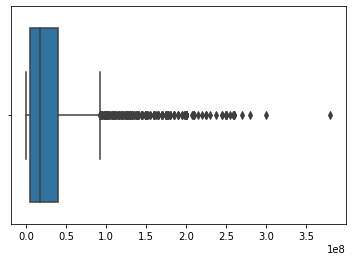

In [171]:
sns.boxplot(x = budgetList)

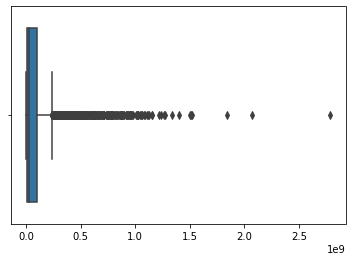

In [172]:
sns.boxplot(x = revenueList)

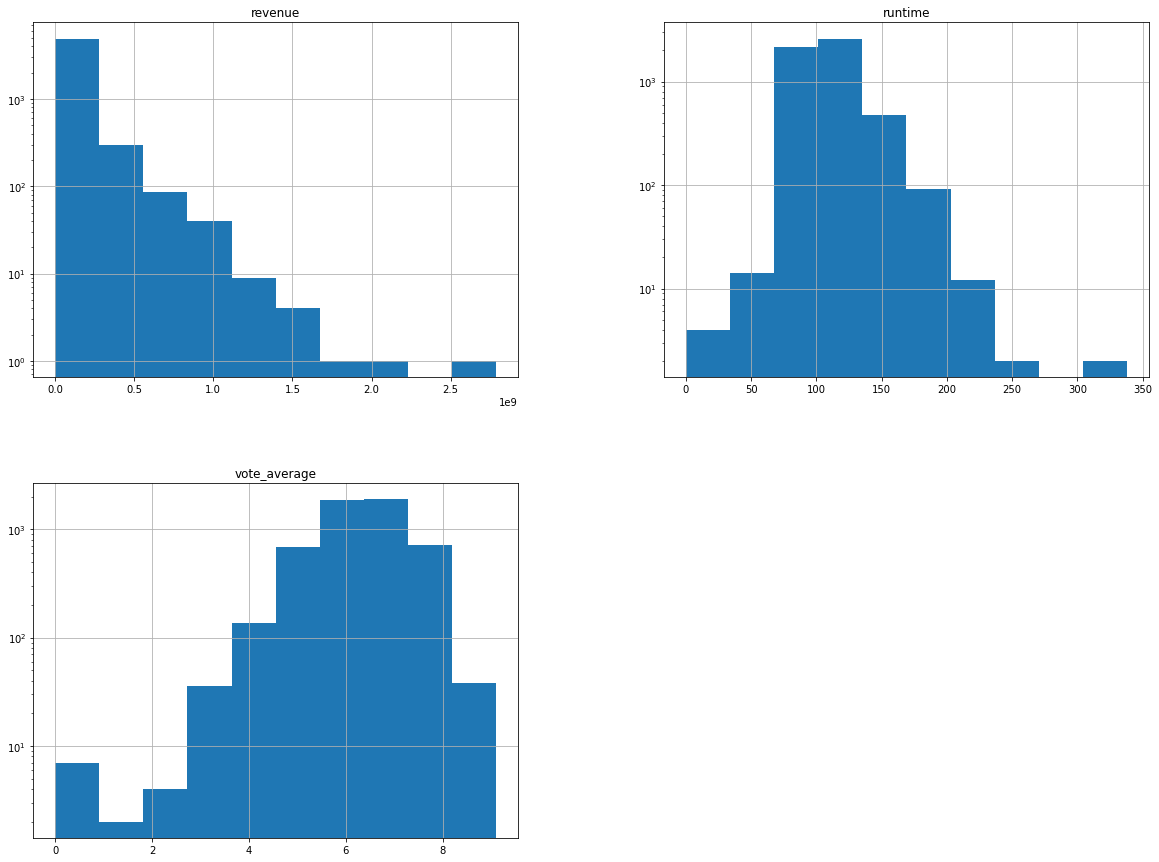

In [173]:
#Histograms
df_filtered[['revenue'] + ['runtime'] + ['vote_average']].hist(figsize=(20,15), log=True);

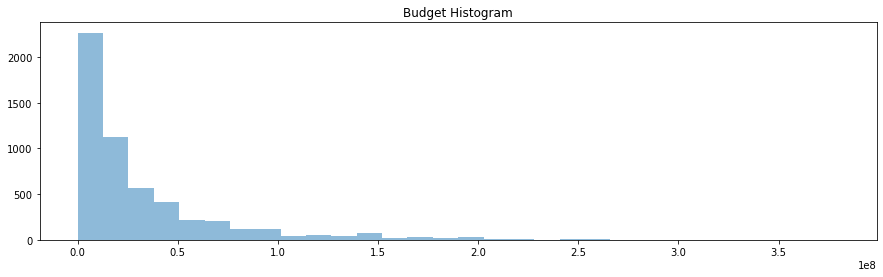

In [174]:
#Histogram for Budget
# Increase the width
plt.figure(figsize=(15,4))
plt.hist(budgetList, bins=30, alpha=0.5)
plt.title('Budget Histogram')
# plt.xlabel('Release Dates')
# plt.ylabel('No. of movies')

plt.show()

### Scatterplot for Runtime vs Budget

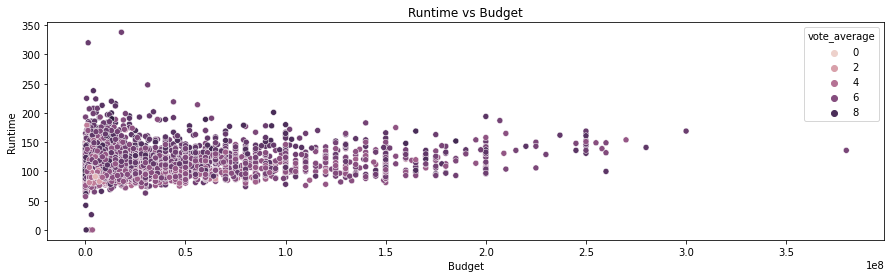

In [175]:
runtime_data = list(df_filtered["runtime"])
vote_avg = df_filtered['vote_average']
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = budgetList,y = runtime_data,hue = vote_avg)
plt.xlabel('Budget')
plt.ylabel('Runtime')
plt.title('Runtime vs Budget')
plt.show()

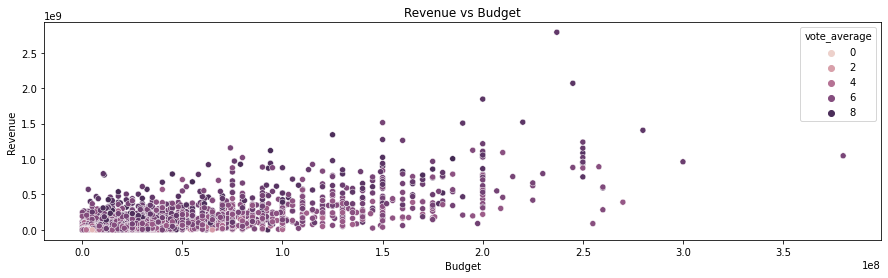

In [176]:
#Using hue as ratings or genres with respect to vote avg
# Increase the width
plt.figure(figsize=(15,4))
sns.scatterplot(x = budgetList,y = revenueList,hue = vote_avg)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget')
plt.show()

### Finding correlation between Budget vs Revenue

In [177]:
corr, _ = pearsonr(budgetList, revenueList)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.730


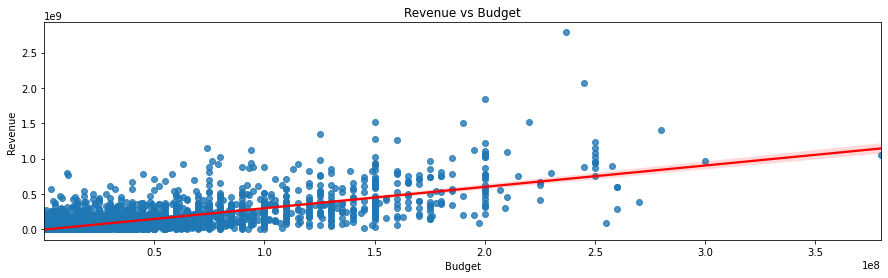

In [178]:
# Increase the width
plt.figure(figsize=(15,4))
#Display regression plot using seaborn
sns.regplot(x = budgetList,y = revenueList,line_kws={'color':'red'})
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget')
plt.show()

### Applying Linear Regression

In [179]:
#Lower the rmse value, better the Regression Model(scaled to the range of data)

import math
model = LinearRegression()
myInt = 1000000000
x = [(m -min(budgetList))/(max(budgetList) - min(budgetList)) for m in budgetList]
y = [(m -min(revenueList))/(max(revenueList) - min(revenueList)) for m in revenueList]
x = np.array(x)
x = x.reshape(-1,1)
y = np.array(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
model.fit(x_train,y_train)
pred = model.predict(x_test)

mse = metrics.mean_squared_error(pred, y_test)

rmse = math.sqrt(mse)

print(rmse)

print("Budget is in the range : ",min(x),max(x))
print("Revenue is in the range : ",min(y),max(y))

# print(pred)
# print(y_test)
# print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

0.04147298742093338
Budget is in the range :  [0.] [1.]
Revenue is in the range :  0.0 1.0


In [180]:
import math
actual = [0, 1, 2, 0, 3]
predicted = [0.1, 1.3, 2.1, 0.5, 3.1]

mse = metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

0.2720294101747089


In [181]:
df_filtered.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0
8,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,False,5.5,174.0


In [182]:
#Code to get a list of all the genres
genreListEncoded = df_filtered["genres"]
genreListEncoded = list(genreListEncoded)
genreList = []
for i in genreListEncoded:
    i = ast.literal_eval(i)
    for j in i:
        genreList.append(j['name'])

genreset = set(genreList)
# convert the set to the list
genres = (list(genreset))
print(genres)

['Western', 'Horror', 'Action', 'Romance', 'Comedy', 'Documentary', 'Music', 'Foreign', 'History', 'Adventure', 'Thriller', 'Family', 'Mystery', 'War', 'TV Movie', 'Drama', 'Animation', 'Fantasy', 'Science Fiction', 'Crime']


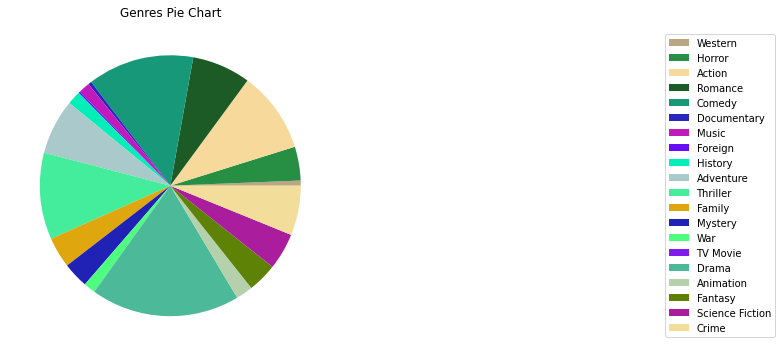

In [183]:
genres_count = []
number_of_colors = len(genres)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

for i in genres:
    count = genreList.count(i)
    genres_count.append(count)

# Increase the width
plt.figure(figsize=(20,6))
plt.pie(genres_count,colors = color)
plt.title("Genres Pie Chart")
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
plt.gca().legend(labels = genres,loc='center left', bbox_to_anchor=(2, 0.5))
plt.show()

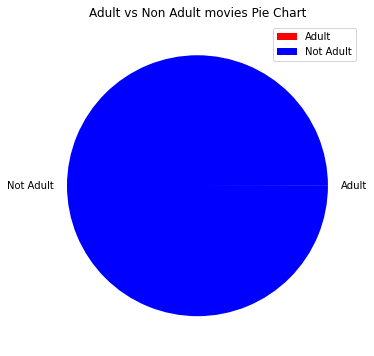

In [184]:
adult_data = list(movies_df['adult'])
count = adult_data.count("True")
count1 = adult_data.count("False")

adult_count = [count,count1]


color = ['r','b']

labels = ["Adult","Not Adult"]
# Increase the width
plt.figure(figsize=(20,6))
plt.title("Adult vs Non Adult movies Pie Chart")
plt.pie(adult_count,colors = color, labels = labels)
plt.legend(labels,loc=1)
plt.show()

In [185]:
# Code to get a list of all the release dates
release_dates = df_filtered["release_date"]
dates = []
for i in release_dates:
    dates.append(int(i[0:4]))
    
print(max(dates))

2017


### Bar chart to show the frequency of the languages

In [186]:
languages = list(df_filtered["original_language"])
uniq_languages = list(set(languages))
lang_count = []
print(uniq_languages)
for i in uniq_languages:
    count = languages.count(i)
    lang_count.append(count)

['de', 'pl', 'id', 'nl', 'nb', 'ur', 'it', 'bm', 'ml', 'es', 'hu', 'kn', 'fi', 'vi', 'ta', 'no', 'pt', 'he', 'te', 'el', 'xx', 'ko', 'da', 'sr', 'en', 'mr', 'fa', 'sv', 'ru', 'af', 'tr', 'fr', 'ro', 'ja', 'is', 'hi', 'th', 'zh', 'ca', 'cn']


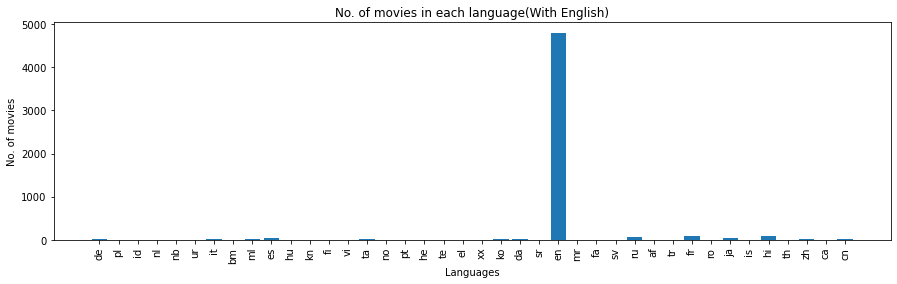

In [187]:
#BAR PLOT WITH EN
# Increase the width
plt.figure(figsize=(15,4))
# Horizontal Bar Plot
plt.bar(uniq_languages, lang_count)

plt.xticks(rotation=90)

plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title("No. of movies in each language(With English)")
# Show Plot
plt.show()

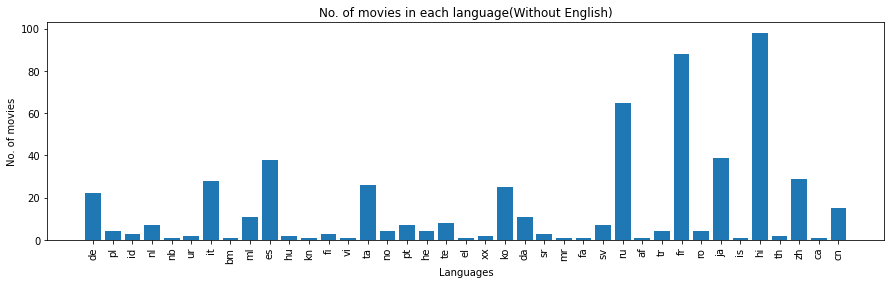

In [188]:
#BAR PLOT WITHOUT EN
uniq_lang_without = []
lang_count_without = []

for i in uniq_languages:
    if i != 'en':
        count = languages.count(i)
        uniq_lang_without.append(i)
        lang_count_without.append(count)

# Increase the width
plt.figure(figsize=(15,4))
# Horizontal Bar Plot
plt.bar(uniq_lang_without, lang_count_without)

plt.xticks(rotation=90)

plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title("No. of movies in each language(Without English)")
# Show Plot
plt.show()

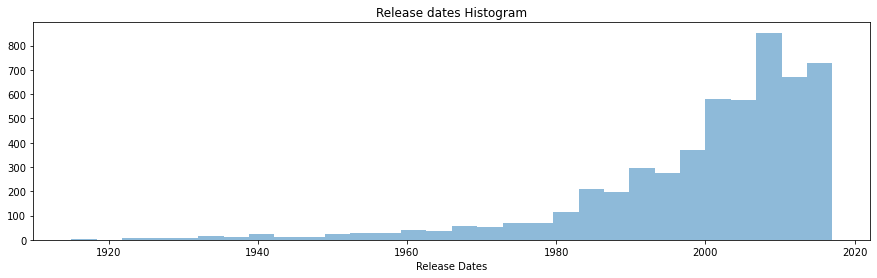

In [189]:
#Histogram for release years
# Increase the width
plt.figure(figsize=(15,4))
plt.hist(dates, bins=30, alpha=0.5)
plt.title('Release dates Histogram')
plt.xlabel('Release Dates')

plt.show()

<class 'list'>
['Burkina Faso', 'Algeria', 'China', 'Bulgaria', 'Turkey', 'Malaysia', 'Hungary', 'Angola', 'Serbia and Montenegro', 'New Zealand', 'Russia', 'Uruguay', 'United Arab Emirates', 'Venezuela', 'United States of America', 'Botswana', 'Argentina', 'Mali', 'Monaco', 'South Africa', 'Indonesia', 'Malta', 'Kazakhstan', 'France', 'Pakistan', 'Lithuania', 'Czech Republic', 'Philippines', 'Thailand', 'Slovenia', 'Serbia', 'India', 'Puerto Rico', 'Morocco', 'Bahamas', 'Finland', 'Chile', 'Poland', 'Paraguay', 'Peru', 'Denmark', 'Japan', 'Switzerland', 'Iran', 'Romania', 'Portugal', 'Liechtenstein', 'Croatia', 'Tunisia', 'Sweden', 'United Kingdom', 'Ghana', 'Canada', 'Singapore', 'Costa Rica', 'South Korea', 'Colombia', 'Ireland', 'Austria', 'Cyprus', 'Spain', 'Germany', 'Iceland', 'Cambodia', 'Qatar', 'Namibia', 'Belgium', 'Australia', 'Taiwan', 'Ukraine', 'Ecuador', 'Greece', 'Norway', 'Hong Kong', 'Italy', 'Brazil', 'Netherlands', 'Luxembourg', 'Mexico', 'Israel']
80
[1, 2, 73, 6,

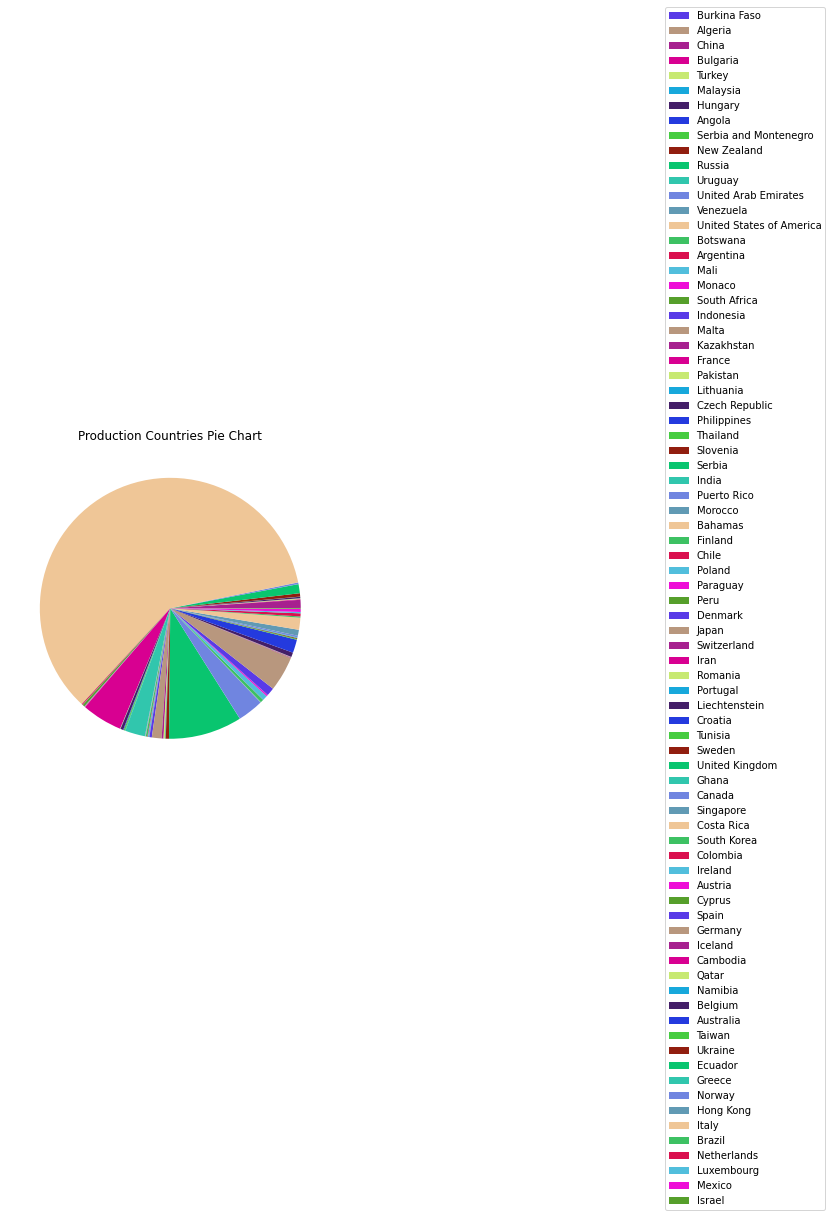

In [190]:
# Pie chart of production countries(Most movies from which countries)
pr_countries = list(df_filtered["production_countries"])
pr_countriesL = []
print(type(pr_countries))
# print(pr_countries)
for i in pr_countries:
    i = ast.literal_eval(i)
    for j in i:
        pr_countriesL.append(j['name'])
        
# print(pr_countriesL)
pr_countrySet = set(pr_countriesL)
pr_countryList = list(pr_countrySet)
print(pr_countryList)

no_of_countries = len(pr_countryList)
print(no_of_countries)

avg = []
for i in pr_countryList:
    count = pr_countriesL.count(i)
    avg.append(count)
    
print(avg)

number_of_colors = len(genres)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
# Increase the width
plt.figure(figsize=(20,6))
plt.pie(avg,colors = color)
plt.title("Production Countries Pie Chart")
# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
plt.gca().legend(labels = pr_countryList,loc='center left', bbox_to_anchor=(2, 0.5))
plt.show()